In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df2 = pd.read_csv("medical_insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df2["smoker"] = df2["smoker"].apply(lambda x:1 if x=="yes" else 0)
df2["sex"] = df2["sex"].apply(lambda x:1 if x=="male" else 0)

In [10]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
df3 = df2
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
encoded_df = pd.get_dummies(df3, columns=["region"])
encoded_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [14]:
encoded_df["region_northeast"] = encoded_df["region_northeast"].apply(lambda x:0 if x==False else 1)
encoded_df["region_northwest"] = encoded_df["region_northwest"].apply(lambda x:0 if x==False else 1)
encoded_df["region_southeast"] = encoded_df["region_southeast"].apply(lambda x:0 if x==False else 1)
encoded_df["region_southwest"] = encoded_df["region_southwest"].apply(lambda x:0 if x==False else 1)
encoded_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [16]:
df4 = encoded_df
df4.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [17]:
X = df4.drop("charges", axis=1)
y = df4["charges"]

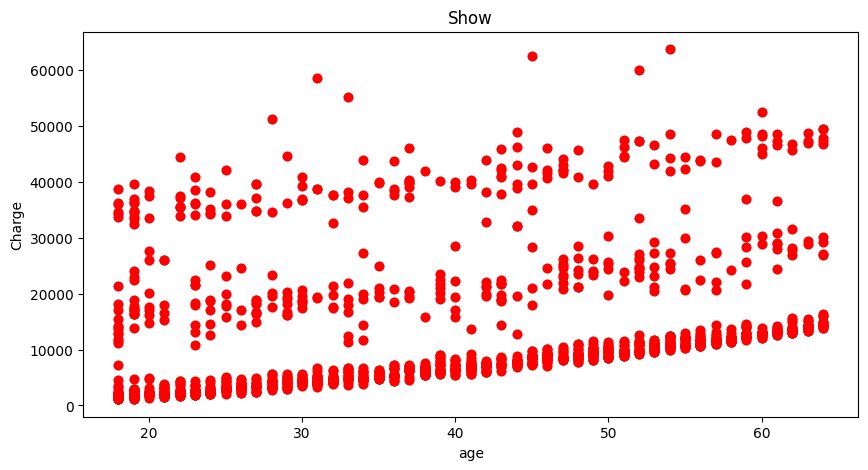

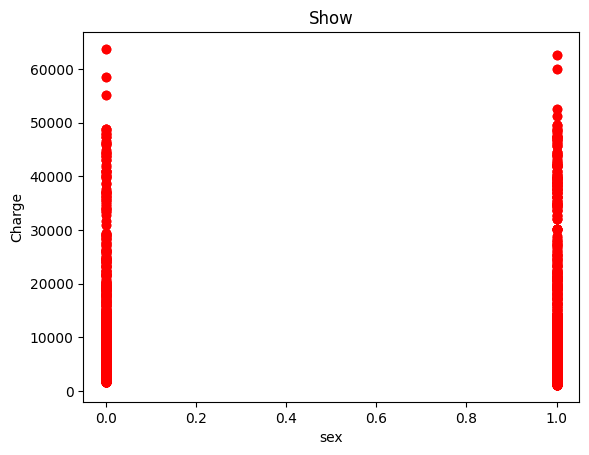

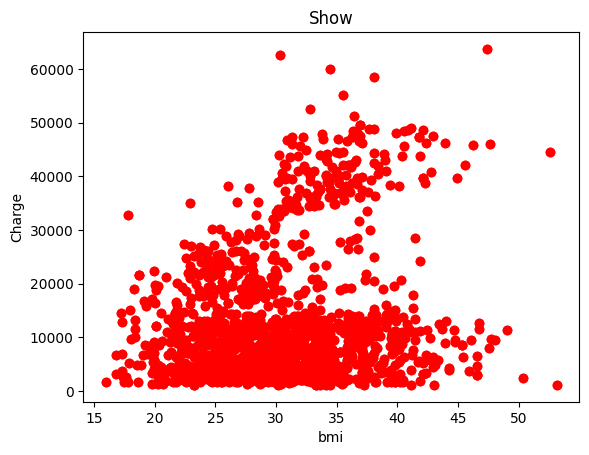

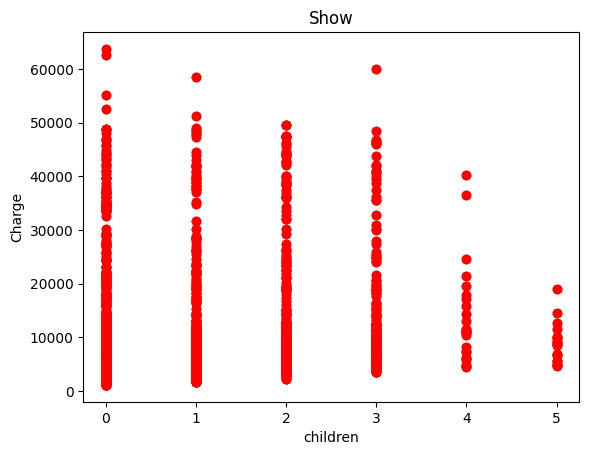

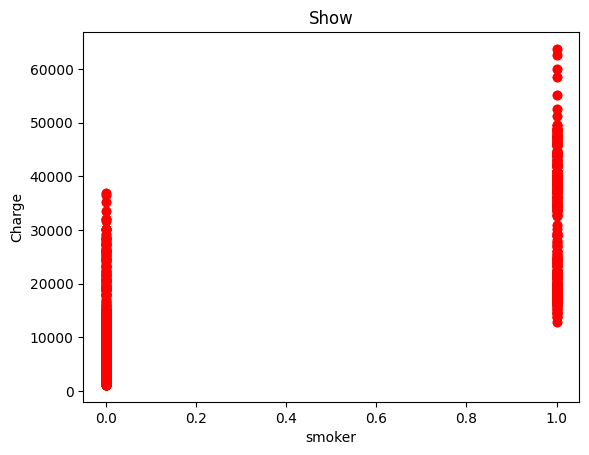

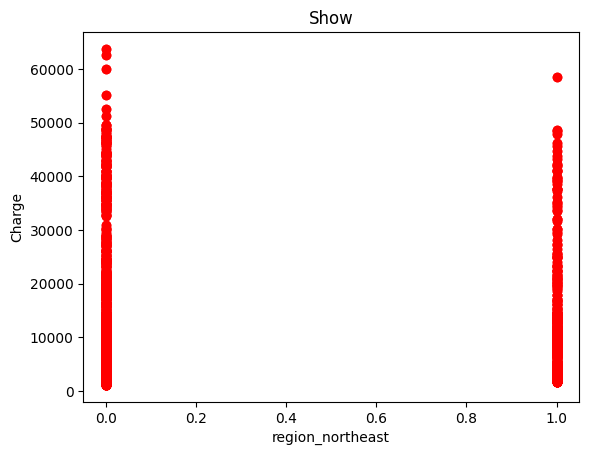

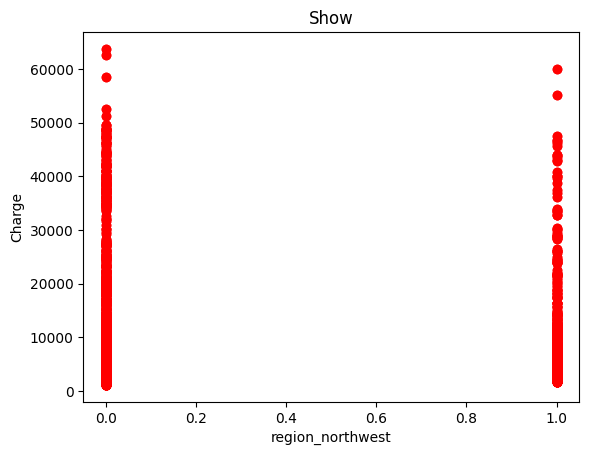

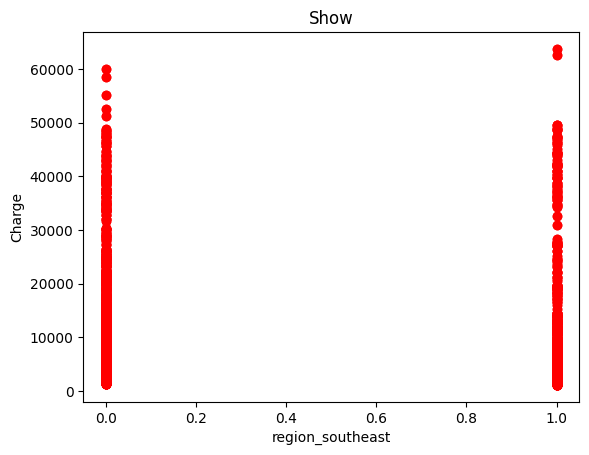

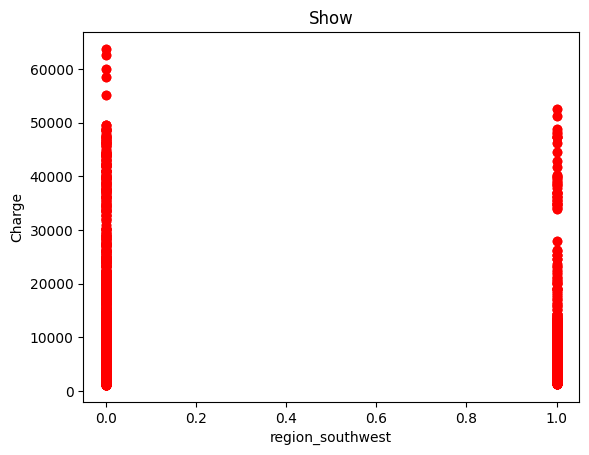

In [19]:
plt.figure(figsize=(10,5))
for i in range (X.shape[1]):
  plt.scatter(X.iloc[:,i],y,color="red")
  plt.xlabel(X.columns[i])
  plt.title("Show")
  plt.ylabel("Charge")
  plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model_dc = DecisionTreeRegressor(max_depth=5)
model_dc.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
# Gradient Boost
# from xgboost import XGBRegressor
# model_gb = XGBRegressor(n_estimators=100,learning_rate=0.1)
# model_gb.fit(X_train,y_train)

In [28]:
# SVM
from sklearn.svm import SVR
model_svm = SVR(kernel="rbf")
model_svm.fit(X_train,y_train)

SVR()

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_l = model_linear.predict(X_test)
y_dc = model_dc.predict(X_test)
y_rf = model_rf.predict(X_test)
y_svm = model_svm.predict(X_test)

In [33]:
# linear
print(f"MAE for linear : {mean_absolute_error(y_test,y_l)}")
print(f"MSE for linear : {mean_squared_error(y_test,y_l)}")
print(f"RMSE for linear : {r2_score(y_test,y_l)}")

MAE for linear : 4181.533829706642
MSE for linear : 37774993.15905328
RMSE for linear : 0.7465278904179782


In [34]:
# DC
print(f"MAE for linear : {mean_absolute_error(y_test,y_dc)}")
print(f"MSE for linear : {mean_squared_error(y_test,y_dc)}")
print(f"RMSE for linear : {r2_score(y_test,y_dc)}")

MAE for linear : 2550.3369999893234
MSE for linear : 20402364.26141629
RMSE for linear : 0.8630991066490072


In [35]:
# Random Forest
print(f"MAE for linear : {mean_absolute_error(y_test,y_rf)}")
print(f"MSE for linear : {mean_squared_error(y_test,y_rf)}")
print(f"RMSE for linear : {r2_score(y_test,y_rf)}")

MAE for linear : 1198.1859846479335
MSE for linear : 5603471.9360164935
RMSE for linear : 0.9624004206532766


In [36]:
# SVM
print(f"MAE for linear : {mean_absolute_error(y_test,y_svm)}")
print(f"MSE for linear : {mean_squared_error(y_test,y_svm)}")
print(f"RMSE for linear : {r2_score(y_test,y_svm)}")

MAE for linear : 8281.578790698606
MSE for linear : 160136546.48589164
RMSE for linear : -0.07452430469151516
